In [2]:
!pip install tensorflow==1.15.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
!pip install -q lucid>=0.2.3
!pip install -q moviepy

In [8]:
!pip install imageio==2.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import numpy as np
import json
import moviepy.editor as mvp
from google.colab import files
import tensorflow.compat.v1.gfile as gfile
import lucid.misc.io.showing as show

In [10]:
from lucid.misc.gl.glcontext import create_opengl_context


import OpenGL.GL as gl
from OpenGL.GLU import *


WIDTH, HEIGHT = 800,600
create_opengl_context((WIDTH, HEIGHT))
    


print(gl.glGetString(gl.GL_VERSION))
print(gl.glGetString(gl.GL_VENDOR)) 


b'4.6.0 NVIDIA 460.32.03'
b'NVIDIA Corporation'


In [71]:
# Outcode & Intersection Points


def outcode(x,y,x_min,y_min,x_max,y_max):
  bit_0="0"
  bit_1="0"
  bit_2="0"
  bit_3="0"

  if x<x_min:
    bit_0="1"
  elif x>x_max:
    bit_1="1"
  elif y<y_min:
    bit_2="1"
  elif y>y_max:
    bit_3="1"
  code = bit_3+bit_2+bit_1+bit_0

  return code


def andi(x,y):
    val = ""
    p=0
    while p<4:
    
        i=int(x[p])
        k=int(y[p])
        
        if i==0 and k==0:
            val+="0"
        elif i==1 and k==1:
            val+="1"
        else:
            val+="0"
        p+=1
    return val

def intersection(code,x,y,x_min,y_min,x_max,y_max,m):
    
    if code[0]=="1":
      x=x+(1/m)*(y_max-y)
      y=y_max
      return [x,y]
    elif code[1]=="1":
      x=x+(1/m)*(y_min-y)
      y=y_min
      return [x,y]

    elif code[2]=="1":
      y=y+m*(x_max - x)
      x=x_max
      return [x,y]
    
    elif code[3]=="1":
      y=y+m*(x_min - x)
      x=x_min

      return [x,y]

In [72]:
# Midpoint line drawing

def findzone(x1,y1,x2,y2):

  dx = x2 - x1
  dy = y2 - y1
  Zone = 0
  if abs(dx) >= abs(dy):
    if dx > 0 and dy > 0:
      Zone = 0
    elif dx < 0 and dy > 0:
      Zone = 3
    elif dx < 0 and dy < 0:
      Zone = 4
    elif dx > 0 and dy < 0:
      Zone = 7
  else:
    if dx > 0 and dy > 0:
      Zone = 1
    elif dx < 0 and dy > 0:
      Zone = 2
    elif dx < 0 and dy < 0:
      Zone = 5
    elif dx > 0 and dy < 0:
      Zone = 6
    
  return Zone

def convertzone0(x,y,temp):

  a,b=0,0
  if temp== 0:
    a,b=x,y
  elif temp== 1:
    a,b=y,x
  elif temp== 2:
    a,b=y,-x
  elif temp== 3:
    a,b=-x,y
  elif temp== 4:
    a,b=-x,-y
  elif temp== 5:
    a,b=-y,-x
  elif temp== 6:
    a,b=-y,x
  elif temp== 7:
    a,b=x,-y

  return a,b



def convert_to_original(x,y,temp):

  g,h=0,0

  if temp== 0:
    g,h=x,y
  elif temp== 1:
    g,h=y,x
  elif temp== 2:
    g,h=-y,x
  elif temp== 3:
    g,h=-x,y
  elif temp== 4:
    g,h=-x,-y
  elif temp== 5:
    g,h=-y,-x
  elif temp== 6:
    g,h=-y,x
  elif temp== 7:
    g,h=x,-y

  return g,h

def DrawLine(x1,y1,x2,y2,col):
  temp=findzone(x1,y1,x2,y2)
  
  p,q=convertzone0(x1,y1,temp)
  m,n=convertzone0(x2,y2,temp)
  
  dx = m-p
  dy = n-q

  d=2*dy-dx

  incE=2*dy
  incNE = 2 * (dy - dx)

  y = q
  x = p

  if dx==0:
    
    while y<=y2:
      c,d=convert_to_original(x,y,temp)
      Pixel(c,d,col)
      
      y+=0.0001

  while x<=x2:
    r,t=convert_to_original(x,y,temp)
    Pixel(r,t,col)

    if d>0:
      d+=incNE
      y+=0.0001
    else:
      d+=incE

    x+=0.0001

def Pixel(x,y,color): 
  gl.glBegin(gl.GL_POINTS)
  if color == "blue":
    gl.glColor3f(0,0,1)
  elif color == "red":
    gl.glColor3f(1,0,0)
  elif color == "green":
    gl.glColor3f(0,1,0)
 
  gl.glVertex2f(x,y)
  gl.glEnd()


0.09999999999999998 0 0.5 0.4



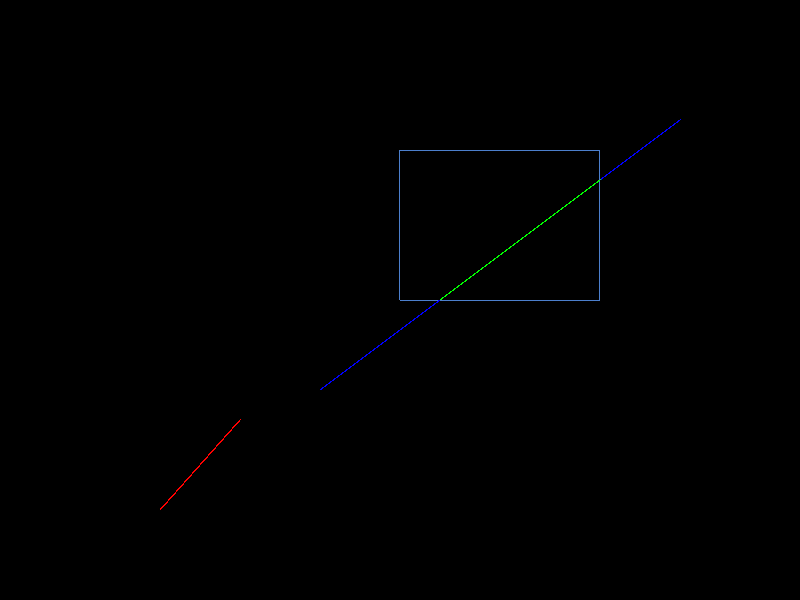

In [73]:
# Cohen_Sutherland Algorithm

gl.glClear(gl.GL_COLOR_BUFFER_BIT)

def window(x_min,y_min,x_max,y_max):
  gl.glColor3f(.3,.5,.8)
  gl.glPointSize(1.3)

  gl.glBegin(gl.GL_LINE_LOOP)
  gl.glVertex2f(x_min,y_min)
  gl.glVertex2f(x_max,y_min)
  gl.glVertex2f(x_max,y_max)
  gl.glVertex2f(x_min,y_max)
  gl.glEnd()


def cohen_sutherland(x1,y1,x2,y2,x_min,y_min,x_max,y_max):
  window(x_min,y_min,x_max,y_max)

  outcode2=outcode(x2,y2,x_min,y_min,x_max,y_max)
  outcode1=outcode(x1,y1,x_min,y_min,x_max,y_max)
  DrawLine(x1,y1,x2,y2,"blue")

  while True:
    if outcode1 == "0000" and outcode2 == "0000":
      print(x1,y1,x2,y2)
      DrawLine(x1,y1,x2,y2,"green")
      break
    elif andi(outcode1,outcode2) != "0000":
      DrawLine(x1,y1,x2,y2,"red")
      break
    else:
      m=(y2-y1)/(x2-x1)
      if outcode1 != "0000":
        
        coord1=intersection(outcode1,x1,y1,x_min,y_min,x_max,y_max,m)
        x1 = coord1[0]
        y1 = coord1[1]
        outcode1=outcode(x1,y1,x_min,y_min,x_max,y_max)
      else:
        coord2=intersection(outcode2,x2,y2,x_min,y_min,x_max,y_max,m)
        x2=coord2[0]
        y2=coord2[1]
        outcode2=outcode(x2,y2,x_min,y_min,x_max,y_max)
  
cohen_sutherland(-0.6,-0.7,-0.4,-0.4,0,0,0.5,0.5)
cohen_sutherland(-0.2,-0.3,0.7,0.6,0,0,0.5,0.5)


img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
img = np.frombuffer(img_buf, np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
show.image(img/255.0)